In [1]:
%matplotlib widget
%load_ext autoreload
%autoreload
import numpy as np
import sys
import matplotlib.pyplot as plt
import matplotlib.animation
import yaml
import cv2
from scipy.spatial.transform import Rotation
from matplotlib.patches import Rectangle
from tqdm import tqdm


# sys.path.append('/local_code/hpe-core/datasets/')
sys.path.append('/home/schiavazza/code/hpe/hpe-core/datasets/')

from vicon_processing.src.projection import ProjectionHelper
from vicon_processing.src.data_helpers import DvsLabeler, DvsHelper, C3dHelper
from vicon_processing.src import vis_utils, utils

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
# import the DVS data
dvs_file_path = "/home/schiavazza/data/hpe/vicon_dataset/processed/simon/drum_s1/atis-s/"
dvs_helper = DvsHelper(dvs_file_path)

In [10]:
dvs_helper.read_points_labels('/home/schiavazza/data/hpe/vicon_dataset/processed/drum_s1/atis-s/labeled_points.yml');
labels_times = np.array(dvs_helper.labeled_points['times'])
print(labels_times)
# labels_times = [0.0]

[ 2.   4.4  6.8  9.2 11.6 14. ]


In [11]:
dvs_helper.labeled_points

{'points': [{'P11:LELB': {'x': 891, 'y': 269},
   'P11:LFHD': {'x': 824, 'y': 78},
   'P11:RELB': {'x': 712, 'y': 264},
   'P11:RFHD': {'x': 794, 'y': 76},
   'P11:STRN': {'x': 808, 'y': 228}},
  {'P11:LELB': {'x': 875, 'y': 309},
   'P11:LFHD': {'x': 816, 'y': 118},
   'P11:RELB': {'x': 704, 'y': 306},
   'P11:RFHD': {'x': 787, 'y': 113},
   'P11:STRN': {'x': 799, 'y': 272}},
  {'P11:LELB': {'x': 878, 'y': 284},
   'P11:LFHD': {'x': 830, 'y': 90},
   'P11:RELB': {'x': 707, 'y': 275},
   'P11:RFHD': {'x': 795, 'y': 90},
   'P11:STRN': {'x': 810, 'y': 233}},
  {'P11:LELB': {'x': 874, 'y': 296},
   'P11:LFHD': {'x': 819, 'y': 90},
   'P11:RELB': {'x': 685, 'y': 259},
   'P11:RFHD': {'x': 783, 'y': 87},
   'P11:STRN': {'x': 797, 'y': 250}},
  {'P11:LELB': {'x': 850, 'y': 272},
   'P11:LFHD': {'x': 850, 'y': 107},
   'P11:RELB': {'x': 709, 'y': 284},
   'P11:RFHD': {'x': 831, 'y': 107},
   'P11:STRN': {'x': 805, 'y': 247}},
  {'P11:LELB': {'x': 875, 'y': 284},
   'P11:LFHD': {'x': 833, 'y'

In [12]:
labels = list(dvs_helper.labeled_points['points'][0].keys())
print(labels)

['P11:LELB', 'P11:LFHD', 'P11:RELB', 'P11:RFHD', 'P11:STRN']


In [13]:
dvs_helper.read_events()

importIitYarp trying path: /home/schiavazza/data/hpe/vicon_dataset/processed/simon/drum_s1/atis-d/


100%|██████████| 15745/15745 [00:50<00:00, 310.43it/s]


Examining info.log: /home/schiavazza/data/hpe/vicon_dataset/processed/simon/drum_s1/atis-d/info.log


{'ts': array([ 0.        ,  0.        ,  0.        , ..., 15.94024992,
        15.94024992, 15.94024992]),
 'x': array([1051,   73,   80, ...,  520,  420,  651], dtype=uint16),
 'y': array([295, 289, 293, ..., 181, 260, 371], dtype=uint16),
 'pol': array([ True,  True,  True, ...,  True, False,  True]),
 'tsOffset': -1698409252.7519}

In [14]:
events = dvs_helper.events

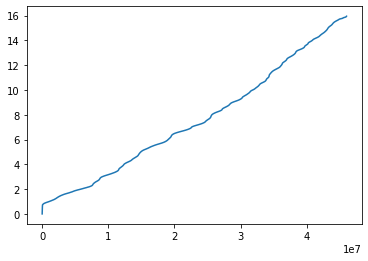

In [16]:
%matplotlib inline
ts = events['ts']
plt.plot(ts)

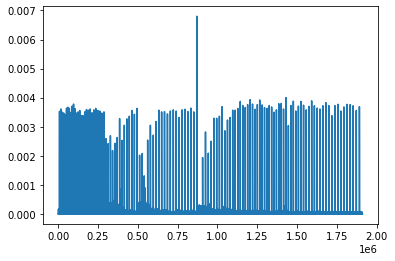

In [21]:
t_start = 5.0
t_end = 5.5
plt.plot(np.diff(ts[
    np.searchsorted(ts, t_start):np.searchsorted(ts, t_end)]))

In [8]:
# load c3d vicon data
c3d_file_path = '/home/schiavazza/data/hpe/vicon_dataset/processed/simon/mix_s1.c3d'
c3d_helper = C3dHelper(c3d_file_path, delay=0.214, camera_markers=True)
print(c3d_helper.reader.point_labels)

['camera:cam_right              ' 'camera:cam_back               '
 'camera:cam_left               ' 'P11:LFHD                      '
 'P11:RFHD                      ' 'P11:LBHD                      '
 'P11:RBHD                      ' 'P11:C7                        '
 'P11:T10                       ' 'P11:CLAV                      '
 'P11:STRN                      ' 'P11:RBAK                      '
 'P11:LSHO                      ' 'P11:LUPA                      '
 'P11:LELB                      ' 'P11:LFRM                      '
 'P11:LWRA                      ' 'P11:LWRB                      '
 'P11:LFIN                      ' 'P11:RSHO                      '
 'P11:RUPA                      ' 'P11:RELB                      '
 'P11:RFRM                      ' 'P11:RWRA                      '
 'P11:RWRB                      ' 'P11:RFIN                      '
 'P11:LASI                      ' 'P11:RASI                      '
 'P11:LPSI                      ' 'P11:RPSI                   

In [27]:
print(c3d_helper.reader.parameter_blocks)

<bound method Manager.parameter_blocks of <c3d.c3d.Reader object at 0x7f5c96333b20>>


In [7]:
c3d_helper.reader.frame_count

1631

In [8]:
# labels_times = [8.0, 9.0, 10.0, 11.0, 12.0, 13.0]
vicon_labeled_frames = c3d_helper.get_frame_time(labels_times)
print(c3d_helper.frame_times)
vicon_points = c3d_helper.get_vicon_points(vicon_labeled_frames, labels)
vicon_points_mark = c3d_helper.transform_points_to_marker_frame(vicon_points)
# vicon_points_mark = vicon_points
print(vicon_labeled_frames)

[-0.214      -0.20399387 -0.19398773 ... 16.07598773 16.08599387
 16.096     ]
[222, 547, 871, 1196, 1521]


In [9]:
c3d_helper.get_vicon_points(vicon_labeled_frames, labels)

{'points': [{'P11:LELB': array([ 828.3848,  621.5468, 1222.6627], dtype=float32),
   'P11:LFHD': array([ 721.96  ,  881.4082, 1750.6737], dtype=float32),
   'P11:RELB': array([ 854.4655, 1197.4315, 1218.3846], dtype=float32),
   'P11:RFHD': array([ 730.5832,  965.9569, 1748.3267], dtype=float32),
   'P11:STRN': array([ 807.4388 ,  894.28156, 1322.7096 ], dtype=float32)},
  {'P11:LELB': array([ 827.31604,  667.43945, 1135.0161 ], dtype=float32),
   'P11:LFHD': array([ 706.31226,  834.7988 , 1691.1466 ], dtype=float32),
   'P11:RELB': array([ 845.4425, 1182.5565, 1161.2905], dtype=float32),
   'P11:RFHD': array([ 707.2406 ,  919.65704, 1697.0841 ], dtype=float32),
   'P11:STRN': array([ 797.28265,  890.04755, 1250.166  ], dtype=float32)},
  {'P11:LELB': array([ 812.8502,  651.4167, 1133.4446], dtype=float32),
   'P11:LFHD': array([ 655.22314,  876.66486, 1669.8022 ], dtype=float32),
   'P11:RELB': array([ 837.29114, 1185.6821 , 1167.1234 ], dtype=float32),
   'P11:RFHD': array([ 667.8204

In [10]:
c3d_helper.markers_T

{}

In [11]:
print(f"times from dvs labels: {dvs_helper.labeled_points['times']}")
print(f"times from vicon labels: {vicon_points_mark['times']}")

times from dvs labels: [2.0, 5.25, 8.5, 11.75, 15.0]
times from vicon labels: [ 2.00736196  5.25935583  8.50134356 11.75333742 15.00533129]


In [12]:
dvs_helper.labeled_points

{'points': [{'P11:LELB': {'x': 891, 'y': 266},
   'P11:LFHD': {'x': 826, 'y': 78},
   'P11:RELB': {'x': 708, 'y': 263},
   'P11:RFHD': {'x': 796, 'y': 70},
   'P11:STRN': {'x': 806, 'y': 232}},
  {'P11:LELB': {'x': 877, 'y': 295},
   'P11:LFHD': {'x': 844, 'y': 96},
   'P11:RELB': {'x': 715, 'y': 275},
   'P11:RFHD': {'x': 813, 'y': 95},
   'P11:STRN': {'x': 804, 'y': 255}},
  {'P11:LELB': {'x': 872, 'y': 298},
   'P11:LFHD': {'x': 835, 'y': 104},
   'P11:RELB': {'x': 705, 'y': 285},
   'P11:RFHD': {'x': 801, 'y': 102},
   'P11:STRN': {'x': 806, 'y': 255}},
  {'P11:LELB': {'x': 876, 'y': 289},
   'P11:LFHD': {'x': 841, 'y': 96},
   'P11:RELB': {'x': 715, 'y': 280},
   'P11:RFHD': {'x': 817, 'y': 96},
   'P11:STRN': {'x': 812, 'y': 250}},
  {'P11:LELB': {'x': 865, 'y': 267},
   'P11:LFHD': {'x': 855, 'y': 115},
   'P11:RELB': {'x': 715, 'y': 292},
   'P11:RFHD': {'x': 833, 'y': 107},
   'P11:STRN': {'x': 814, 'y': 258}}],
 'times': [2.0, 5.25, 8.5, 11.75, 15.0]}

In [13]:
vicon_points_mark

{'points': [{'P11:LELB': array([8.28384827e+02, 6.21546814e+02, 1.22266272e+03, 1.00000000e+00]),
   'P11:LFHD': array([7.21960022e+02, 8.81408203e+02, 1.75067371e+03, 1.00000000e+00]),
   'P11:RELB': array([8.54465515e+02, 1.19743152e+03, 1.21838464e+03, 1.00000000e+00]),
   'P11:RFHD': array([7.30583191e+02, 9.65956909e+02, 1.74832666e+03, 1.00000000e+00]),
   'P11:STRN': array([8.07438782e+02, 8.94281555e+02, 1.32270959e+03, 1.00000000e+00])},
  {'P11:LELB': array([8.27316040e+02, 6.67439453e+02, 1.13501611e+03, 1.00000000e+00]),
   'P11:LFHD': array([7.06312256e+02, 8.34798828e+02, 1.69114661e+03, 1.00000000e+00]),
   'P11:RELB': array([8.45442505e+02, 1.18255652e+03, 1.16129053e+03, 1.00000000e+00]),
   'P11:RFHD': array([7.07240601e+02, 9.19657043e+02, 1.69708411e+03, 1.00000000e+00]),
   'P11:STRN': array([7.97282654e+02, 8.90047546e+02, 1.25016602e+03, 1.00000000e+00])},
  {'P11:LELB': array([8.12850220e+02, 6.51416687e+02, 1.13344458e+03, 1.00000000e+00]),
   'P11:LFHD': array

In [14]:
proj_helper = ProjectionHelper(vicon_points_mark, dvs_helper.labeled_points)
proj_helper.import_camera_calbration('/home/schiavazza/data/hpe/vicon_dataset/drum_f1/atis-s/calib-s.txt');

Number of 3d points: 25
Number of image points: 25


In [15]:
np.set_printoptions(suppress=True)
print(proj_helper.image_points)

[[891. 266.   1.]
 [826.  78.   1.]
 [708. 263.   1.]
 [796.  70.   1.]
 [806. 232.   1.]
 [877. 295.   1.]
 [844.  96.   1.]
 [715. 275.   1.]
 [813.  95.   1.]
 [804. 255.   1.]
 [872. 298.   1.]
 [835. 104.   1.]
 [705. 285.   1.]
 [801. 102.   1.]
 [806. 255.   1.]
 [876. 289.   1.]
 [841.  96.   1.]
 [715. 280.   1.]
 [817.  96.   1.]
 [812. 250.   1.]
 [865. 267.   1.]
 [855. 115.   1.]
 [715. 292.   1.]
 [833. 107.   1.]
 [814. 258.   1.]]


In [16]:
# tmp = np.copy(proj_helper.world_points[:7])
# proj_helper.world_points[:7] = proj_helper.world_points[7:]
# proj_helper.world_points[7:] = tmp
# # proj_helper.world_points = np.flip(proj_helper.world_points, axis=0)

In [17]:
# T = proj_helper.find_R_t(constrain_translation=False)
T = proj_helper.find_R_t_opencv()
# T = proj_helper.T_to_transform(T)
print(T)
# T[2, -1] = 0

[[  -0.27434199   -0.96163163    0.00104434 1520.91071721]
 [  -0.10023667    0.02751619   -0.99458306 1063.00646795]
 [   0.95639379   -0.27296058   -0.10393959 2976.43705294]
 [   0.            0.            0.            1.        ]]


In [29]:
# T = np.load('../scripts/data/extrinsic.npy')
# np.save("/home/schiavazza/data/hpe/vicon_dataset/drum_f1/atis-s/extrinsic.npy", T)

In [19]:
print(Rotation.from_matrix(T[:3, :3]).as_euler('xyz'))
print(T[:3, :3])
print(f"translation in new frame: {T[:-1, -1]}")
print(f"translation in world: {np.linalg.inv(T[:3, :3]) @ T[:-1, -1]}")

[-1.93463007 -1.27439503 -2.79129026]
[[-0.27434199 -0.96163163  0.00104434]
 [-0.10023667  0.02751619 -0.99458306]
 [ 0.95639379 -0.27296058 -0.10393959]]
translation in new frame: [1520.91071721 1063.00646795 2976.43705294]
translation in world: [ 2322.84402569 -2245.75592448 -1365.02954207]


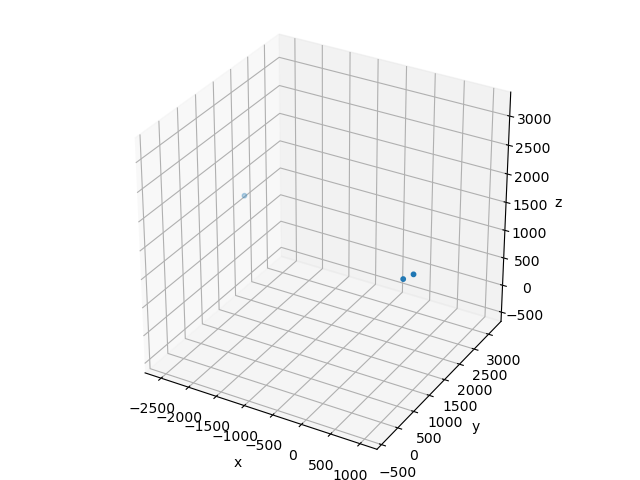

In [20]:
%matplotlib widget
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.set_box_aspect([1.0, 1.0, 1.0])

zero_Tr = np.eye(4)
c3d_helper.marker_T_at_frame_vector(1)
# marker_T0 = np.zeros((4, 4))
# marker_T0[:3, :3] = Rotation.from_euler('xyz', [np.pi/2, 0, 0]).as_matrix()
# marker_T0[:-1, -1] = [0, 0, 550]
# # marker_T0[:-1, -1] = Rotation.from_euler('xyz', [-np.pi/2, 0, 0]).as_matrix() @ marker_T0[:-1, -1]
# marker_T0[-1, -1] = 1
# print(marker_T0)

# labels = [
#         'camera:cam_back',
#         'camera:cam_right',
#         'camera:cam_left'
#         ]
vis_utils.plot_points_3d(ax, 
        proj_helper.transform_points(
            c3d_helper.points_dict_to_array(c3d_helper.get_points_dict(1))[:3], zero_Tr))

# for i in range(len(vicon_labeled_frames)):
#     marker_T = np.linalg.inv(c3d_helper.markers_T[vicon_labeled_frames[i]])
#     print(Rotation.from_matrix(marker_T[:3, :3]).as_euler('xyz'))
#     vis_utils.plot_points_3d(ax,
#                             proj_helper.transform_points(
#                                 proj_helper.world_points[i*4:(1+i)*4],
#                                 zero_Tr
#                             )
    # )
# vis_utils.plot_points_3d(ax,
#                         proj_helper.transform_points(
#                             proj_helper.world_points[i*7:(1+i)*7],
#                             marker_T
#                         )
# )

# vis_utils.plot_frame(ax, T)

# for Tr in c3d_helper.markers_T.values():
#     vis_utils.plot_frame(ax, np.linalg.inv(Tr))
#     vis_utils.plot_frame(ax, np.linalg.inv(Tr) @ np.linalg.inv(T))

vis_utils.set_axes_equal(ax)

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.tight_layout()

plt.show()

In [21]:
labels_times

array([ 2.  ,  5.25,  8.5 , 11.75, 15.  ])

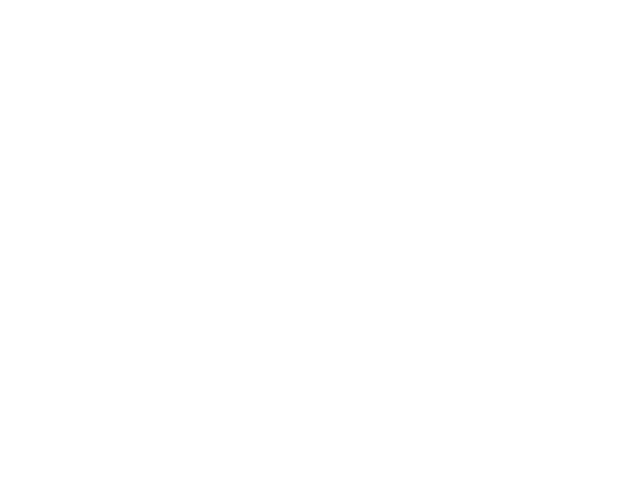

In [22]:
plt.close()
plt.clf()

In [23]:
# proj_helper.undistort_image_points()
print(proj_helper.K)

[[1167.44     0.     655.426]
 [   0.    1166.27   334.978]
 [   0.       0.       1.   ]]


In [24]:
projected_points = proj_helper.project_to_frame(
    proj_helper.transform_points(
        proj_helper.world_points, T
        )
    )

# projected_points = proj_helper.project_to_frame(
#     proj_helper.world_points
#     )

In [25]:
proj_helper.world_points

array([[ 828.38482666,  621.54681396, 1222.66271973,    1.        ],
       [ 721.96002197,  881.40820312, 1750.67370605,    1.        ],
       [ 854.46551514, 1197.43151855, 1218.38464355,    1.        ],
       [ 730.58319092,  965.95690918, 1748.32666016,    1.        ],
       [ 807.43878174,  894.28155518, 1322.70959473,    1.        ],
       [ 827.31604004,  667.43945312, 1135.01611328,    1.        ],
       [ 706.31225586,  834.79882812, 1691.14660645,    1.        ],
       [ 845.44250488, 1182.55651855, 1161.29052734,    1.        ],
       [ 707.24060059,  919.65704346, 1697.08410645,    1.        ],
       [ 797.28265381,  890.04754639, 1250.16601562,    1.        ],
       [ 812.85021973,  651.41668701, 1133.44458008,    1.        ],
       [ 655.22314453,  876.66485596, 1669.80224609,    1.        ],
       [ 837.2911377 , 1185.68212891, 1167.12341309,    1.        ],
       [ 667.82043457,  960.73565674, 1670.55456543,    1.        ],
       [ 785.42095947,  902.423889

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


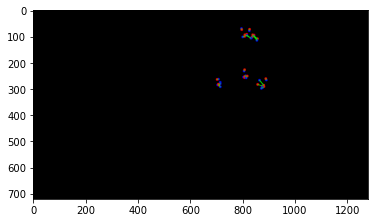

In [26]:
%matplotlib inline
plt.clf()
frame = np.zeros((720, 1280, 3))
frame = vis_utils.plot_2d_difference(frame, proj_helper.image_points, projected_points)
plt.imshow(frame)
plt.show()

0
(5, 3)
1
(5, 3)
2
(5, 3)
3
(5, 3)
4
(5, 3)


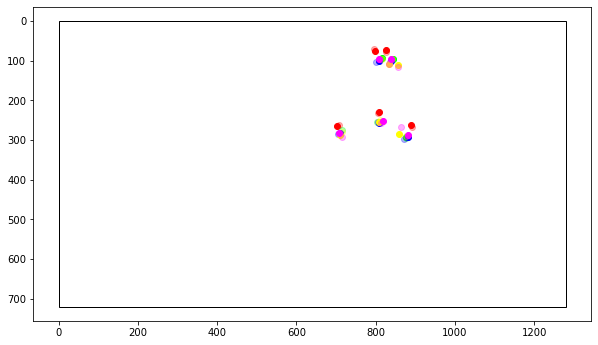

In [28]:
%matplotlib inline
fig = plt.figure(figsize=(10, 10))
ax = plt.axes()

s = 5
colors = [
    (1.0, 0.0, 0.0),
    (0.0, 1.0, 0.0),
    (0.0, 0.0, 1.0),
    (1.0, 1.0, 0.0),
    (1.0, 0.0, 1.0),
    (0.0, 1.0, 1.0),
    (1.0, 1.0, 1.0),
    (1.0, 1.0, 1.0)
]
for i, t in enumerate(labels_times):
    print(i)
    vis_utils.plot_2d_points_plt(ax, projected_points[s*i:s*(i+1)], color=colors[i])
    print(projected_points[s*i:s*(i+1)].shape)

    alpha = 0.3
    vis_utils.plot_2d_points_plt(ax, proj_helper.image_points[s*i:s*(i+1)], color=colors[i], alpha=alpha)

ax.add_patch(Rectangle((0, 0), 1280, 720, fill=False))

xlim = ax.get_xlim()
ylim = ax.get_ylim()

ax.set_xlim(min(0, xlim[0]), max(1280, xlim[1]))
ax.set_ylim(min(0, ylim[0]), max(720, ylim[1]))

ax.axes.set_aspect('equal')

plt.gca().invert_yaxis()

In [28]:
proj_helper.image_points

array([[789., 152.,   1.],
       [836., 648.,   1.],
       [695., 638.,   1.],
       [682., 322.,   1.],
       [798., 132.,   1.],
       [799., 649.,   1.],
       [693., 654.,   1.],
       [693., 395.,   1.],
       [804., 144.,   1.],
       [797., 667.,   1.],
       [695., 654.,   1.],
       [692., 421.,   1.]])

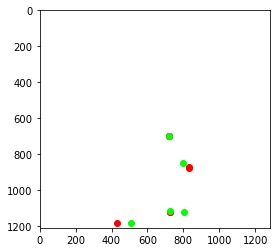

In [29]:
%matplotlib inline
fig = plt.figure()
ax = plt.axes()

s = 7

vis_utils.plot_2d_points_plt(ax, proj_helper.world_points[:s, :2], color=(1.0, 0.0, 0.0))
vis_utils.plot_2d_points_plt(ax, proj_helper.world_points[s:s*2, :2], color=(0.0, 1.0, 0.0))


xlim = ax.get_xlim()
ylim = ax.get_ylim()

ax.set_xlim(min(0, xlim[0]), max(1280, xlim[1]))
ax.set_ylim(min(0, ylim[0]), max(720, ylim[1]))

ax.axes.set_aspect('equal')

plt.gca().invert_yaxis()

In [27]:
dvs_helper.read_events()

importIitYarp trying path: /hpe/Users/Stefano/hpe/vicon/side_f1/atis-d/


KeyboardInterrupt: 

In [ ]:
c3d_helper.find_start_time()

0.0

In [ ]:

def get_projected_points(frame_id):
    T_markers = c3d_helper.marker_T_at_frame_vector(frame_id)
    v_points = c3d_helper.get_points_frame(frame_id)
    v_points = v_points[:, :4]
    v_points[:, -1] = 1
    # rot = Rotation.from_matrix(T_markers[:3, :3]).as_rotvec()
    # t = T_markers[:-1, -1]

    # projected_points_cv2, _ = cv2.projectPoints(v_points[:, :-1].transpose(), rot, t, proj_helper.K, proj_helper.D)
    # projected_points_cv2 = projected_points_cv2[:, 0, :]

    projected_points = proj_helper.project_to_frame(
        proj_helper.transform_points(
            v_points, T @ T_markers
            )
        )
    
    return projected_points

# Define the codec and create VideoWriter object
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter('output.mp4', fourcc, 30.0, (1280, 720))

for i in tqdm(range(int(1), int(c3d_helper.reader.frame_count), 3)):
    projected_points = get_projected_points(i);
    
    frame = np.ones((720, 1280, 3), dtype=np.uint8) * 100

    ts_start = c3d_helper.frame_times[i]
    frame = utils.extract_frame(dvs_helper.events, ts_start, ts_start + 0.01, (720, 1280, 3))

    frame = vis_utils.plot_2d_points(frame, projected_points)
    out.write(frame.astype(np.uint8))
out.release()

  0%|          | 0/481 [00:00<?, ?it/s]

 13%|█▎        | 64/481 [00:05<00:37, 11.18it/s]


KeyboardInterrupt: 

In [ ]:
labels = [
    'event_camera:front',
    'event_camera:side',
    'event_camera:top'
]

xs = []
for i in tqdm(range(1, int(c3d_helper.reader.frame_count / 4), 3)):
    T = c3d_helper.marker_T_at_frame_vector(i)

    rot = Rotation.from_matrix(T[:3, :3])

    xs.append(rot.as_euler('xyz'))
    # vicon_points_mark = c3d_helper.transform_points_to_marker_frame(vicon_points)

  0%|          | 0/328 [00:00<?, ?it/s]

100%|██████████| 328/328 [00:14<00:00, 22.33it/s]


In [ ]:
labels = [
    'event_camera:front',
    'event_camera:side',
    'event_camera:top'
]

start_frame = 500
end_frame = 3000
step = 2
n_frames = int((end_frame - start_frame) / step)

vicon_points = c3d_helper.get_vicon_points(np.arange(start_frame, end_frame, step), labels)
# vicon_points_mark = c3d_helper.transform_points_to_marker_frame(vicon_points)

camera_markers_points = c3d_helper.points_dict_to_array(vicon_points)
n_markers = int(camera_markers_points.shape[0] / n_frames)

frames_points = camera_markers_points.reshape(n_frames, n_markers, 4)[:, :, :3]

T_markers_list = []
for i in range(start_frame, end_frame, step):
    T_marker = c3d_helper.marker_T_at_frame_vector(i)

    X, Y, Z, U, V, W = vis_utils.XYZ_frame(T_marker)

    T_markers_list.append([X, Y, Z, U, V, W])


KeyboardInterrupt: 

In [ ]:
camera_markers_points.shape

(3750, 4)

(49, 4)


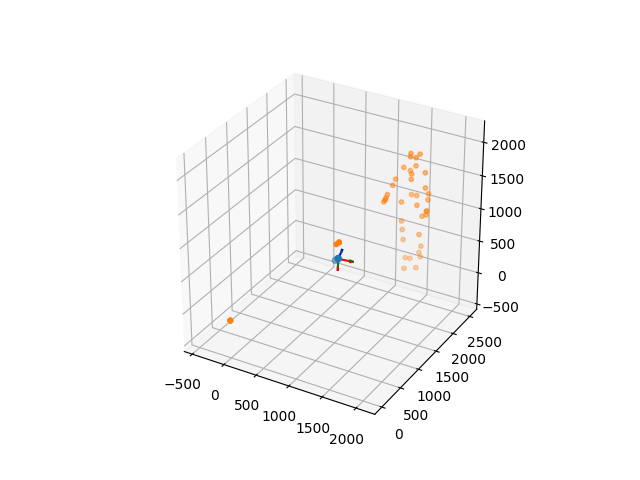

In [ ]:
%matplotlib widget
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.set_box_aspect([1.0, 1.0, 1.0])

skel = ax.scatter(frames_points[0][:, 0], frames_points[0][:, 1], frames_points[0][:, 2])

vis_utils.plot_points_3d(ax, 
        proj_helper.transform_points(
            c3d_helper.points_dict_to_array(c3d_helper.get_points_dict(vicon_labeled_frames[0])), zero_Tr))

T_marker = c3d_helper.marker_T_at_frame_vector(start_frame)
frame_plot = vis_utils.plot_frame(ax, np.linalg.inv(T_marker))

def quiver_data_to_segments(X, Y, Z, u, v, w, length=1):
    segments = (X, Y, Z, X+v*length, Y+u*length, Z+w*length)
    segments = np.array(segments).reshape(6,-1)
    return [[[x, y, z], [u, v, w]] for x, y, z, u, v, w in zip(*list(segments))]

def update(n):
    skel._offsets3d = (frames_points[n][:, 0], frames_points[n][:, 1], frames_points[n][:, 2])
    # points._offsets3d = (sub_frames[n][:, 0], sub_frames[n][:, 1], sub_frames[n][:, 2])
    # X, Y, Z, U, V, W = T_markers_list[n]
    # segments = quiver_data_to_segments(X, Y, Z, U, V, W, length=5)
    # frame_plot.set_segments(segments)


# points = ax.scatter(sub_frames[0][:, 0], sub_frames[0][:, 1], sub_frames[0][:, 2], c='red', marker='^')
vis_utils.set_axes_equal(ax)

ani = matplotlib.animation.FuncAnimation(fig, update, range(n_frames), 
                               interval=200, blit=True)

plt.show()

In [ ]:
plt.close()

In [ ]:
labels = [
    'event_camera:front',
    'event_camera:side',
    'event_camera:top'
]

start_frame = 500
end_frame = 3000
step = 1
n_frames = int((end_frame - start_frame) / step)
# samples_times = np.linspace(14.0, 15.0, 20)
# vicon_labeled_frames = c3d_helper.get_frame_time(samples_times)
vicon_points = c3d_helper.get_vicon_points(vicon_labeled_frames, labels)
camera_markers_points = c3d_helper.points_dict_to_array(vicon_points)


In [ ]:
vicon_labeled_frames

[1562, 1662]

1.0
1.0


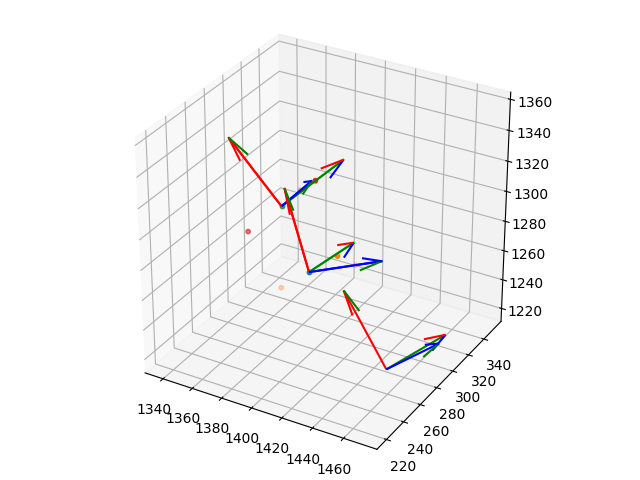

In [ ]:
%matplotlib widget
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.set_box_aspect([1.0, 1.0, 1.0])

zero_Tr = np.eye(4)

# vis_utils.plot_points_3d(ax, 
#         proj_helper.transform_points(
#             c3d_helper.points_dict_to_array(c3d_helper.get_points_dict(vicon_labeled_frames[0])), zero_Tr))

n_frames = int(camera_markers_points.shape[0] / 3)

# for i in range(n_frames):
#     vis_utils.plot_points_3d(ax, 
#         camera_markers_points.reshape(n_frames, 3, 4)[i, :, :-1]
#     )

colors = [
    (1.0, 0.0, 0.0),
    (0.0, 1.0, 0.0),
    (0.0, 0.0, 1.0)
]

prev_mid = [0.0, 0.0, 0.0]
for i, ps in enumerate(vicon_points['points']):
    camera_front = ps['event_camera:front'][:3]
    camera_side = ps['event_camera:side'][:3]
    camera_top = ps['event_camera:top'][:3]

    side_top_mid = (camera_side + camera_top) / 2
    vis_utils.plot_points_3d(ax, np.array([side_top_mid]))

    z = camera_front - side_top_mid
    z = z / np.linalg.norm(z)

    t = camera_top - side_top_mid
    t = t / np.linalg.norm(t)

    x = np.cross(t, z)
    x = x / np.linalg.norm(x)

    y = np.cross(z, x)
    y = y / np.linalg.norm(y)

    vectors = np.vstack((x, y, z))

    print(np.linalg.det(vectors))

    vectors = vectors * 50
    x = vectors[0]
    y = vectors[1]
    z = vectors[2]

    
#     ax.plot([camera_top[0], camera_front[0], camera_side[0]], 
#             [camera_top[1], camera_front[1], camera_side[1]], 
#             [camera_top[2], camera_front[2], camera_side[2]])
    
    # ax.plot_trisurf([camera_top[0], camera_front[0], camera_side[0]], 
    #     [camera_top[1], camera_front[1], camera_side[1]], 
    #     [camera_top[2], camera_front[2], camera_side[2]],
    #     color=colors[i])
    
    ax.plot([side_top_mid[0], side_top_mid[0] + z[0]],
            [side_top_mid[1], side_top_mid[1] + z[1]],
            [side_top_mid[2], side_top_mid[2] + z[2]], c=colors[2])
    
    ax.plot([side_top_mid[0], side_top_mid[0] + y[0]],
            [side_top_mid[1], side_top_mid[1] + y[1]],
            [side_top_mid[2], side_top_mid[2] + y[2]], c=colors[1])
    
    ax.plot([side_top_mid[0], side_top_mid[0] + x[0]],
            [side_top_mid[1], side_top_mid[1] + x[1]],
            [side_top_mid[2], side_top_mid[2] + x[2]], c=colors[0])


    side_top_mid = (camera_side + camera_top) / 2
    

#     tmp = camera_front + (camera_front - side_top_mid) * 5
#     ax.plot([side_top_mid[0], tmp[0]],
#             [side_top_mid[1], tmp[1]],
#             [side_top_mid[2], tmp[2]])
    
    camera_points = np.copy(camera_markers_points.reshape(n_frames, 3, 4))
    
    vis_utils.plot_points_3d(ax, 
        camera_points[i, :, :-1]
    )

for k in sorted(c3d_helper.markers_T.keys())[:]:
    Tr = np.copy(c3d_helper.markers_T[k])

#     # Tr[:3, :3] = T_0[:3, :3] @ Tr[:3, :3]
    vis_utils.plot_frame(ax, np.linalg.inv(Tr), arrow_length=50)
#     # vis_utils.plot_frame(ax, np.linalg.inv(Tr) @ np.linalg.inv(T))
#     print(Tr[:3, :3].transpose())

vis_utils.set_axes_equal(ax)
plt.tight_layout()

plt.show()



In [ ]:
plt.close()
plt.clf()

In [ ]:
labels = [
    'event_camera:front',
    'event_camera:side',
    'event_camera:top'
]

start_frame = 500
end_frame = 3000
step = 1
n_frames = int((end_frame - start_frame) / step)

vicon_points = c3d_helper.get_vicon_points(np.arange(start_frame,end_frame, step), labels)
camera_markers_points = c3d_helper.points_dict_to_array(vicon_points)


In [ ]:
distances = []
for i, ps in enumerate(vicon_points['points']):
    camera_front = ps['event_camera:front'][:3]
    camera_side = ps['event_camera:side'][:3]
    camera_top = ps['event_camera:top'][:3]

    t  = camera_top - camera_front
    distances.append(np.linalg.norm(t))

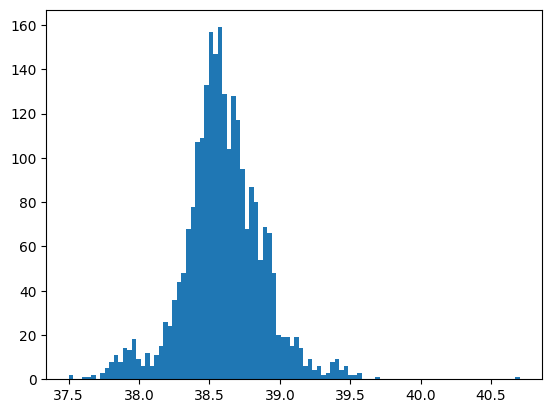

In [ ]:
%matplotlib inline
plt.clf()

distances = np.array(distances)
distances = distances[distances > 0.1]

plt.hist(distances, 100);
plt.show()

TypeError: '>' not supported between instances of 'list' and 'int'

In [ ]:
start_frame = 200
end_frame = 3500
step = 1
n_frames = int((end_frame - start_frame) / step)

rot_traj= np.zeros((n_frames, 3))
for i in tqdm(range(start_frame, end_frame, step)):
    T_marker = c3d_helper.marker_T_at_frame_vector(i)
    # T_m = np.linalg.inv(T_marker)
    # pos_traj[i - start_frame] = T_m[:-1, -1]

    rot = Rotation.from_matrix(T_marker[:3, :3]).as_euler('xyz')

    rot_traj[i - start_frame] = rot


  0%|          | 0/3300 [00:00<?, ?it/s]

 63%|██████▎   | 2078/3300 [03:53<03:58,  5.12it/s]/home/schiavazza/code/hpe/vicon_recordings/src/data_helpers.py:163: RuntimeWarning: invalid value encountered in divide
  t  = t / np.linalg.norm(t)
/home/schiavazza/code/hpe/vicon_recordings/src/data_helpers.py:166: RuntimeWarning: invalid value encountered in divide
  f = f / np.linalg.norm(f)
/tmp/ipykernel_31243/3012687754.py:12: UserWarning: Gimbal lock detected. Setting third angle to zero since it is not possible to uniquely determine all angles.
  rot = Rotation.from_matrix(T_marker[:3, :3]).as_euler('xyz')
 70%|███████   | 2322/3300 [04:48<03:41,  4.41it/s]

 70%|███████   | 2324/3300 [04:48<03:48,  4.27it/s]

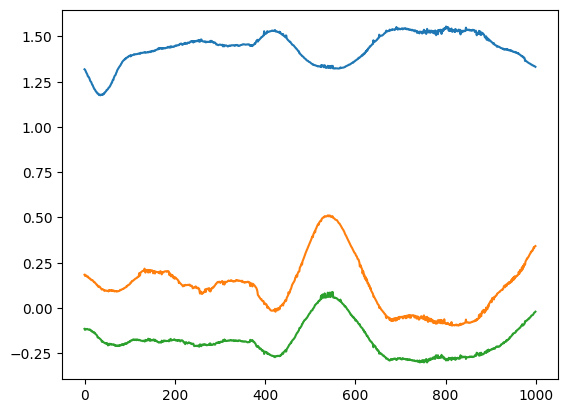

In [ ]:
plt.plot(rot_traj)

In [ ]:
camera_markers_points.shape

(7500, 4)

In [ ]:
pos_traj.shape

(2500, 3)

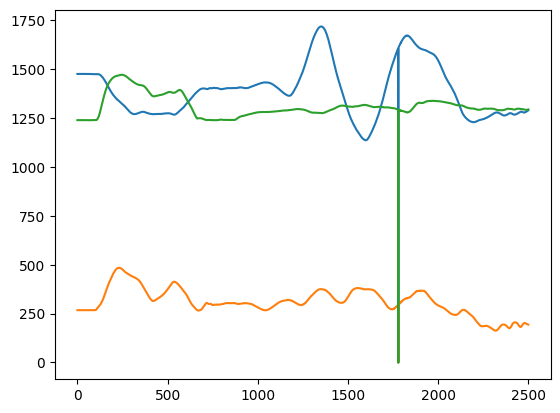

In [ ]:
plt.plot(camera_markers_points.reshape(2500, 3, 4)[:, 0, :-1])

In [26]:

labels = ['P3:RFOO']
points = c3d_helper.get_vicon_points(range(1, int(c3d_helper.reader.frame_count)), labels)

In [27]:
points

{'points': [{'P3:RFOO': array([ 725.02814, 1120.5168 ,   78.58247], dtype=float32)},
  {'P3:RFOO': array([ 725.0567 , 1120.5159 ,   78.57121], dtype=float32)},
  {'P3:RFOO': array([ 725.0998  , 1120.4935  ,   78.555595], dtype=float32)},
  {'P3:RFOO': array([ 725.10284, 1120.4318 ,   78.57215], dtype=float32)},
  {'P3:RFOO': array([ 725.1308 , 1120.4193 ,   78.57676], dtype=float32)},
  {'P3:RFOO': array([ 725.1562 , 1120.4742 ,   78.59119], dtype=float32)},
  {'P3:RFOO': array([ 725.1492 , 1120.4882 ,   78.59536], dtype=float32)},
  {'P3:RFOO': array([ 725.11914 , 1120.491   ,   78.600075], dtype=float32)},
  {'P3:RFOO': array([ 725.07697, 1120.4423 ,   78.59255], dtype=float32)},
  {'P3:RFOO': array([ 725.0624  , 1120.4817  ,   78.588005], dtype=float32)},
  {'P3:RFOO': array([ 725.04816 , 1120.5332  ,   78.556114], dtype=float32)},
  {'P3:RFOO': array([ 724.97614, 1120.532  ,   78.53561], dtype=float32)},
  {'P3:RFOO': array([ 724.9403 , 1120.5242 ,   78.50039], dtype=float32)},
  {

In [28]:
p_hist = []
for p in points['points']:
    print(list(p.values())[0])
    p_hist.append(list(p.values())[0])

[ 725.02814 1120.5168    78.58247]
[ 725.0567  1120.5159    78.57121]
[ 725.0998   1120.4935     78.555595]
[ 725.10284 1120.4318    78.57215]
[ 725.1308  1120.4193    78.57676]
[ 725.1562  1120.4742    78.59119]
[ 725.1492  1120.4882    78.59536]
[ 725.11914  1120.491      78.600075]
[ 725.07697 1120.4423    78.59255]
[ 725.0624   1120.4817     78.588005]
[ 725.04816  1120.5332     78.556114]
[ 724.97614 1120.532     78.53561]
[ 724.9403  1120.5242    78.50039]
[ 724.93024 1120.5092    78.51274]
[ 724.8895  1120.4834    78.45356]
[ 724.9139  1120.4542    78.44946]
[ 724.92773  1120.4554     78.428894]
[ 724.959    1120.4396     78.407646]
[ 724.9666   1120.4644     78.408295]
[ 725.0361  1120.4022    78.43887]
[ 725.125   1120.3951    78.42237]
[ 725.1724  1120.4272    78.45473]
[ 725.2418   1120.3807     78.449104]
[ 725.342    1120.3899     78.453445]
[ 725.3537  1120.3531    78.45525]
[ 725.4165  1120.3113    78.47057]
[ 725.49084 1120.2892    78.48302]
[ 725.5203  1120.2759    78.

In [29]:
p_hist = np.array(p_hist)

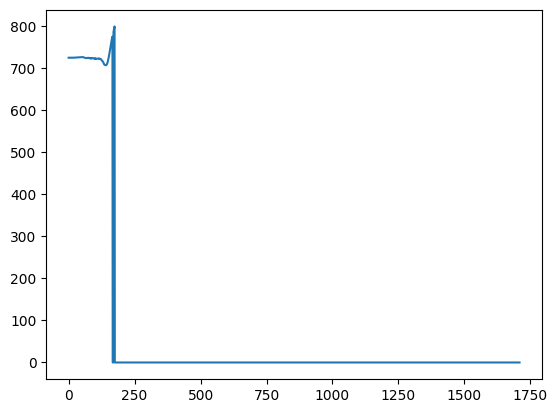

In [30]:
plt.plot(p_hist[:, 0])

In [39]:
r = []
for f in c3d_helper.reader.read_frames():
    r.append(np.count_nonzero(f[1][:, 0]))

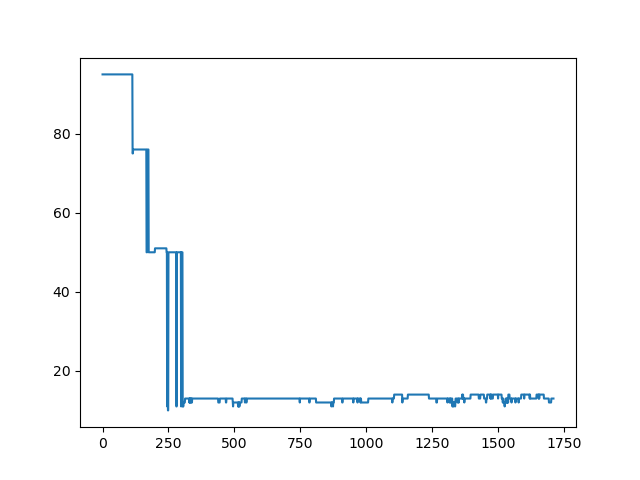

In [40]:
plt.plot(r)